In [1]:
from glob import glob
import os
import shutil
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns


### BCN20000

In [2]:
train_csv = pd.read_csv('ori_BCN20000/bcn_20k_train.csv')
test_csv = pd.read_csv('ori_BCN20000/bcn_20k_test.csv')
# 统计标签分布
train_counts = train_csv['diagnosis'].value_counts()
test_counts = test_csv['diagnosis'].value_counts()
train_csv

,bcn_filename,age_approx,anatom_site_general,diagnosis,lesion_id,capture_date,sex,split
0,BCN_0000000001.jpg,55.0,anterior torso,MEL,BCN_0003884,2012-05-16,male,train
1,BCN_0000000003.jpg,50.0,anterior torso,MEL,BCN_0000019,2015-07-09,female,train
2,BCN_0000000004.jpg,85.0,head/neck,SCC,BCN_0003499,2015-11-23,male,train
3,BCN_0000000006.jpg,60.0,anterior torso,NV,BCN_0003316,2015-06-16,male,train
4,BCN_0000000010.jpg,30.0,anterior torso,BCC,BCN_0004874,2014-02-18,female,train
...,...,...,...,...,...,...,...,...
12408,BCN_0000020348.jpg,85.0,head/neck,BCC,BCN_0003925,2013-03-05,female,train
12409,BCN_0000020349.jpg,65.0,anterior torso,BKL,BCN_0001819,2016-05-05,male,train
12410,BCN_0000020350.jpg,70.0,lower extremity,MEL,BCN_0001085,2015-01-29,male,train
12411,BCN_0000020352.jpg,55.0,palms/soles,NV,BCN_0002083,2016-05-08,female,train


In [28]:
# 遍历每一行
for _, row in train_csv.iterrows():
    try:
        diagnosis = row["diagnosis"]
        if pd.isna(diagnosis):  # 跳过空值
            continue
            
        src_path = os.path.join("ori_BCN20000/bcn_20k_train", row["bcn_filename"])
        dst_dir = os.path.join("BCN", diagnosis)
        
        # 创建目标目录（如果不存在）
        os.makedirs(dst_dir, exist_ok=True)
        
        # 复制文件
        shutil.copy(src_path, os.path.join(dst_dir, row["bcn_filename"]))
        
    except KeyError:
        print(f"Missing diagnosis for {row['bcn_filename']}")
    except FileNotFoundError:
        print(f"Source file not found: {row['bcn_filename']}")
    except Exception as e:
        print(f"Error processing {row['bcn_filename']}: {str(e)}")

In [22]:
BCN_id = train_csv['lesion_id'].tolist()
BCN_id

['BCN_0003884',
 'BCN_0000019',
 'BCN_0003499',
 'BCN_0003316',
 'BCN_0004874',
 'BCN_0004756',
 'BCN_0002221',
 'BCN_0005020',
 'BCN_0003352',
 'BCN_0002462',
 'BCN_0001733',
 'BCN_0004684',
 'BCN_0003781',
 'BCN_0002865',
 'BCN_0002140',
 'BCN_0001437',
 'BCN_0005484',
 'BCN_0000044',
 'BCN_0003908',
 'BCN_0005035',
 'BCN_0002004',
 'BCN_0001747',
 'BCN_0000509',
 'BCN_0002522',
 'BCN_0000384',
 'BCN_0000263',
 'BCN_0004643',
 'BCN_0004934',
 'BCN_0001106',
 'BCN_0005007',
 'BCN_0004047',
 'BCN_0000822',
 'BCN_0005607',
 'BCN_0004405',
 'BCN_0002344',
 'BCN_0004167',
 'BCN_0004612',
 'BCN_0005242',
 'BCN_0000514',
 'BCN_0003377',
 'BCN_0004487',
 'BCN_0004638',
 'BCN_0001171',
 'BCN_0004151',
 'BCN_0004335',
 'BCN_0005421',
 'BCN_0000994',
 'BCN_0000662',
 'BCN_0003839',
 'BCN_0001822',
 'BCN_0001745',
 'BCN_0000871',
 'BCN_0003787',
 'BCN_0005400',
 'BCN_0001626',
 'BCN_0005100',
 'BCN_0002598',
 'BCN_0002079',
 'BCN_0000063',
 'BCN_0002021',
 'BCN_0005160',
 'BCN_0001994',
 'BCN_00

In [3]:
train_csv["diagnosis"].unique(), test_csv["diagnosis"].unique()

(array(['MEL', 'SCC', 'NV', 'BCC', 'BKL', 'AK', 'DF', 'VASC'], dtype=object),
 array([nan]))

(-0.5, 7.5)

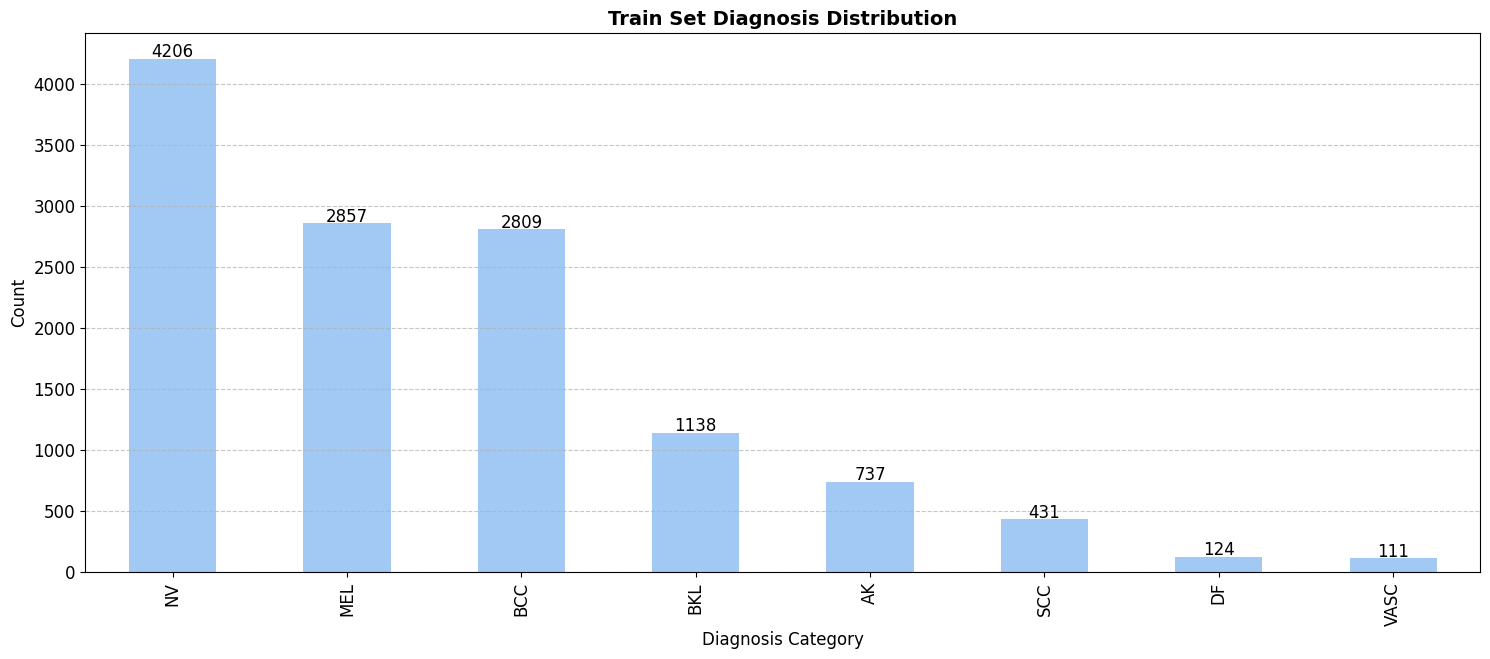

In [4]:
# 配置马卡龙配色
sns.set_palette(sns.color_palette("pastel"))  # 使用seaborn的pastel调色板
plt.rcParams['font.size'] = 12  # 统一字体大小

# 创建子图时添加grid和注释
fig, ax1 = plt.subplots(figsize=(18, 7))

# 训练集分布（添加数值标签）
train_bar = train_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Train Set Diagnosis Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Diagnosis Category', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# 在柱子上方添加数值
for p in train_bar.patches:
    ax1.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')


# 统一坐标轴范围
max_cat = len(train_counts)
ax1.set_xlim(-0.5, max_cat-0.5)


### ph2

In [5]:
from datasets import load_dataset

# 示例：从 Hugging Face 上加载一个 .parquet 数据集
dataset = load_dataset("ori_ph2")  # 或者你自己的数据集名称

# 查看前几条数据
print(dataset['train'][0])

{'filename': 'IMD002.bmp', 'image': <PIL.BmpImagePlugin.BmpImageFile image mode=RGB size=765x572 at 0x7FA4DA832BE0>, 'description': 'BENIGN: Dermatoscopic image of an atypical nevus, asymmetrical in one axis, with variegated coloration including light brown and dark brown, atypical pigment network visible, no dots or globules present, no streaks visible, no regression areas, absence of blue-whitish veil, high-resolution clinical photograph at 20x magnification captured with Tuebinger Mole Analyzer system, dermatology reference quality image'}


/home/yxma/anaconda3/envs/CL/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
save_dir = "PH2"
os.makedirs(save_dir, exist_ok=True)
label_trans = {
    "BENIGN": "NV",
    "MALIGNANT": "MEL",
}
for item in dataset['train']:
    print(item)
    print(item['filename'])
    print(item['image'])
    print(item['description'].split(': ')[0])
    # 创建以description命名的子目录
    dest_dir = os.path.join(save_dir, label_trans[item['description'].split(': ')[0]])
    os.makedirs(dest_dir, exist_ok=True)

    # 构造完整保存路径
    save_path = os.path.join(dest_dir, item['filename'].replace('.bmp', '.jpg'))
    
    # 保存图片（保持原始格式）
    item['image'].save(save_path)
    print(f'Saved: {save_path}')

{'filename': 'IMD002.bmp', 'image': <PIL.BmpImagePlugin.BmpImageFile image mode=RGB size=765x572 at 0x7FA4D96966D0>, 'description': 'BENIGN: Dermatoscopic image of an atypical nevus, asymmetrical in one axis, with variegated coloration including light brown and dark brown, atypical pigment network visible, no dots or globules present, no streaks visible, no regression areas, absence of blue-whitish veil, high-resolution clinical photograph at 20x magnification captured with Tuebinger Mole Analyzer system, dermatology reference quality image'}
IMD002.bmp
<PIL.BmpImagePlugin.BmpImageFile image mode=RGB size=765x572 at 0x7FA4D96966D0>
BENIGN
Saved: PH2/NV/IMD002.jpg
{'filename': 'IMD003.bmp', 'image': <PIL.BmpImagePlugin.BmpImageFile image mode=RGB size=765x574 at 0x7FA4D9696A60>, 'description': 'BENIGN: Dermatoscopic image of a common nevus, fully symmetrical shape, with uniform dark brown coloration, typical pigment network visible, no dots or globules present, no streaks visible, no re

In [7]:
len(os.listdir('PH2/NV')), len(os.listdir('PH2/MEL'))

(160, 40)

### MILK10k

In [8]:
milk_gt = pd.read_csv("ori_MILK10k/MILK10k_Training_GroundTruth.csv")
milk_meta = pd.read_csv("ori_MILK10k/MILK10k_Training_Metadata.csv")
milk_supple = pd.read_csv("ori_MILK10k/MILK10k_Training_Supplement.csv")


In [9]:
milk_gt.head()

,lesion_id,AKIEC,BCC,BEN_OTH,BKL,DF,INF,MAL_OTH,MEL,NV,SCCKA,VASC
0,IL_0000652,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,IL_0003176,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,IL_0004688,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,IL_0005081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,IL_0006177,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
milk_meta.head()

,lesion_id,image_type,isic_id,attribution,copyright_license,image_manipulation,age_approx,sex,skin_tone_class,site,MONET_ulceration_crust,MONET_hair,MONET_vasculature_vessels,MONET_erythema,MONET_pigmented,MONET_gel_water_drop_fluid_dermoscopy_liquid,MONET_skin_markings_pen_ink_purple_pen
0,IL_0000652,clinical: close-up,ISIC_8149219,MILK study team,CC-BY-NC,altered,70.0,male,1,head_neck_face,0.166749,0.163601,0.002284,0.124315,0.719495,0.220399,0.237601
1,IL_0000652,dermoscopic,ISIC_4671410,MILK study team,CC-BY-NC,instrument only,70.0,male,1,head_neck_face,0.659859,0.156478,0.016397,0.032357,0.847014,0.138121,0.148776
2,IL_0003176,clinical: close-up,ISIC_3904045,MILK study team,CC-BY-NC,instrument only,45.0,female,5,head_neck_face,0.348609,0.614718,0.013415,0.447485,0.061977,0.296341,0.058006
3,IL_0003176,dermoscopic,ISIC_5371928,MILK study team,CC-BY-NC,instrument only,45.0,female,5,head_neck_face,0.392950,0.897668,0.367882,0.645776,0.122108,0.719937,0.329812
4,IL_0004688,clinical: close-up,ISIC_0791494,MILK study team,CC-BY-NC,instrument only,50.0,male,3,lower_extremity,0.889925,0.120788,0.004546,0.487298,0.036550,0.146776,0.086027


In [11]:
milk_supple.head()

,isic_id,diagnosis_full,diagnosis_confirm_type,invasion_thickness_interval
0,ISIC_0051817,"Squamous cell carcinoma, Invasive",histopathology,NaN
1,ISIC_0073863,"Nevus, Reed",histopathology,NaN
2,ISIC_0075884,"Nevus, Acral",histopathology,NaN
3,ISIC_0076255,Basal cell carcinoma,histopathology,NaN
4,ISIC_0077054,Basal cell carcinoma,histopathology,NaN


In [12]:
meta_mapping = milk_meta.set_index('isic_id')[['lesion_id', 'image_type']].to_dict('index')
img_lists = glob("ori_MILK10k/MILK10k_Training_Input/*/*.jpg")
# 遍历所有图片
for img_info in img_lists:
    isic_id = os.path.splitext(os.path.basename(img_info))[0]  # 假设filename是ISIC_ID加扩展名
    src_path = img_info  # 假设包含原始路径信息
    
    # 获取元数据
    meta_info = meta_mapping.get(isic_id)
    
    if not meta_info:
        print(f"跳过未找到元数据的图像: {isic_id}")
        continue
        
    lesion_id = meta_info['lesion_id']
    image_type = meta_info['image_type'].split(":")[0].strip()  # 提取clean image_type
    
    # 获取GT信息
    gt_row = milk_gt[milk_gt['lesion_id'] == lesion_id]
    if gt_row.empty:
        print(f"跳过未找到GT数据的lesion: {lesion_id}")
        continue
       
    # 找到值为1的列
    active_cols = gt_row.iloc[:, 1:].columns[gt_row.iloc[0, 1:] == 1.0].tolist()
    # print(isic_id, meta_info, lesion_id, image_type, active_cols) 
    # 处理移动逻辑
    if len(active_cols) == 1:
        dest_dir = os.path.join(image_type, active_cols[0])
        os.makedirs(dest_dir, exist_ok=True)
        dest_path = os.path.join(dest_dir, os.path.basename(src_path))  # 获取文件名
        shutil.copy(src_path, dest_path)  # 改为复制操作
        print(f"Copied: {src_path} -> {dest_path}")
    else:
        print(f"需人工检查 | lesion_id: {lesion_id} | image_type: {image_type} | 激活列: {active_cols}")



Copied: ori_MILK10k/MILK10k_Training_Input/IL_0000652/ISIC_4671410.jpg -> dermoscopic/BCC/ISIC_4671410.jpg
Copied: ori_MILK10k/MILK10k_Training_Input/IL_0000652/ISIC_8149219.jpg -> clinical/BCC/ISIC_8149219.jpg
Copied: ori_MILK10k/MILK10k_Training_Input/IL_0003176/ISIC_3904045.jpg -> clinical/BCC/ISIC_3904045.jpg
Copied: ori_MILK10k/MILK10k_Training_Input/IL_0003176/ISIC_5371928.jpg -> dermoscopic/BCC/ISIC_5371928.jpg
Copied: ori_MILK10k/MILK10k_Training_Input/IL_0004688/ISIC_0791494.jpg -> clinical/BCC/ISIC_0791494.jpg
Copied: ori_MILK10k/MILK10k_Training_Input/IL_0004688/ISIC_3624913.jpg -> dermoscopic/BCC/ISIC_3624913.jpg
Copied: ori_MILK10k/MILK10k_Training_Input/IL_0005081/ISIC_5186409.jpg -> dermoscopic/SCCKA/ISIC_5186409.jpg
Copied: ori_MILK10k/MILK10k_Training_Input/IL_0005081/ISIC_5667730.jpg -> clinical/SCCKA/ISIC_5667730.jpg
Copied: ori_MILK10k/MILK10k_Training_Input/IL_0006177/ISIC_1048297.jpg -> dermoscopic/BCC/ISIC_1048297.jpg
Copied: ori_MILK10k/MILK10k_Training_Input/IL

Copied: ori_MILK10k/MILK10k_Training_Input/IL_0033882/ISIC_3881896.jpg -> dermoscopic/BCC/ISIC_3881896.jpg
Copied: ori_MILK10k/MILK10k_Training_Input/IL_0039324/ISIC_1874410.jpg -> dermoscopic/BCC/ISIC_1874410.jpg
Copied: ori_MILK10k/MILK10k_Training_Input/IL_0039324/ISIC_8429141.jpg -> clinical/BCC/ISIC_8429141.jpg
Copied: ori_MILK10k/MILK10k_Training_Input/IL_0041758/ISIC_3704603.jpg -> dermoscopic/MEL/ISIC_3704603.jpg
Copied: ori_MILK10k/MILK10k_Training_Input/IL_0041758/ISIC_4499437.jpg -> clinical/MEL/ISIC_4499437.jpg
Copied: ori_MILK10k/MILK10k_Training_Input/IL_0044468/ISIC_5047383.jpg -> clinical/MEL/ISIC_5047383.jpg
Copied: ori_MILK10k/MILK10k_Training_Input/IL_0044468/ISIC_6046943.jpg -> dermoscopic/MEL/ISIC_6046943.jpg
Copied: ori_MILK10k/MILK10k_Training_Input/IL_0047878/ISIC_0433706.jpg -> dermoscopic/NV/ISIC_0433706.jpg
Copied: ori_MILK10k/MILK10k_Training_Input/IL_0047878/ISIC_2308076.jpg -> clinical/NV/ISIC_2308076.jpg
Copied: ori_MILK10k/MILK10k_Training_Input/IL_00531

In [13]:
label_list = os.listdir("clinical")
label_list

['BCC',
 'SCCKA',
 'AKIEC',
 'NV',
 'BKL',
 'MEL',
 'BEN_OTH',
 'DF',
 'MAL_OTH',
 'VASC',
 'INF']

In [14]:
milk_isic_id = milk_meta["isic_id"].to_list()
milk_isic_id

['ISIC_8149219',
 'ISIC_4671410',
 'ISIC_3904045',
 'ISIC_5371928',
 'ISIC_0791494',
 'ISIC_3624913',
 'ISIC_5667730',
 'ISIC_5186409',
 'ISIC_8803389',
 'ISIC_1048297',
 'ISIC_2729538',
 'ISIC_5107821',
 'ISIC_1498519',
 'ISIC_5916190',
 'ISIC_3209508',
 'ISIC_9546309',
 'ISIC_2978483',
 'ISIC_8325963',
 'ISIC_9769821',
 'ISIC_3780652',
 'ISIC_8947496',
 'ISIC_7213515',
 'ISIC_5881121',
 'ISIC_9803465',
 'ISIC_9923124',
 'ISIC_1225678',
 'ISIC_8438197',
 'ISIC_6039074',
 'ISIC_1660154',
 'ISIC_2641217',
 'ISIC_0652620',
 'ISIC_8615296',
 'ISIC_8598339',
 'ISIC_8870441',
 'ISIC_8431081',
 'ISIC_2768555',
 'ISIC_0402893',
 'ISIC_5203599',
 'ISIC_2944762',
 'ISIC_1347581',
 'ISIC_5462275',
 'ISIC_6993481',
 'ISIC_1006010',
 'ISIC_3881896',
 'ISIC_8429141',
 'ISIC_1874410',
 'ISIC_4499437',
 'ISIC_3704603',
 'ISIC_5047383',
 'ISIC_6046943',
 'ISIC_2308076',
 'ISIC_0433706',
 'ISIC_4030094',
 'ISIC_8463837',
 'ISIC_7081965',
 'ISIC_4345756',
 'ISIC_9191957',
 'ISIC_8370666',
 'ISIC_9047853

### isic 2019

In [15]:
isic19_train_gt = pd.read_csv("ori_isic2019/ISIC_2019_Training_GroundTruth.csv")
isic19_test_gt = pd.read_csv("ori_isic2019/ISIC_2019_Test_GroundTruth.csv")
isic19_train_meta = pd.read_csv("ori_isic2019/ISIC_2019_Training_Metadata.csv") 
isic19_test_meta = pd.read_csv("ori_isic2019/ISIC_2019_Test_Metadata.csv") 


In [16]:
isic19_train_gt.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
isic19_test_gt.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,score_weight,validation_weight
0,ISIC_0034321,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,ISIC_0034322,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,ISIC_0034323,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,ISIC_0034324,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,ISIC_0034325,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
isic19_train_meta.head()

,image,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000,55.0,anterior torso,NaN,female
1,ISIC_0000001,30.0,anterior torso,NaN,female
2,ISIC_0000002,60.0,upper extremity,NaN,female
3,ISIC_0000003,30.0,upper extremity,NaN,male
4,ISIC_0000004,80.0,posterior torso,NaN,male


In [19]:
isic19_test_meta.head()

,image,age_approx,anatom_site_general,sex
0,ISIC_0034321,60.0,NaN,female
1,ISIC_0034322,70.0,anterior torso,male
2,ISIC_0034323,70.0,lower extremity,male
3,ISIC_0034324,70.0,lower extremity,male
4,ISIC_0034325,30.0,upper extremity,female


In [59]:
def has_overlap_1(a, b):
    return bool(set(a) & set(b))

In [60]:
has_overlap_1(isic19_test_gt['image'].to_list(), milk_isic_id)

False

In [61]:
has_overlap_1(isic19_train_gt['image'].to_list(), milk_isic_id)

False

In [20]:
isic19_train_meta['lesion_id'] = isic19_train_meta['lesion_id'].astype(str)

# 创建掩码
msk_mask = isic19_train_meta['lesion_id'].str.startswith('MSK')
bcn_mask = isic19_train_meta['lesion_id'].str.startswith('BCN')
ham_mask = isic19_train_meta['lesion_id'].str.startswith('HAM')

# 创建子表
df_msk = isic19_train_meta[msk_mask]
df_bcn = isic19_train_meta[bcn_mask]
df_ham = isic19_train_meta[ham_mask]

# 其余子表（既不是MSK/BCN/HAM，也排除了nan等）
df_other = isic19_train_meta[~(msk_mask | bcn_mask | ham_mask)]

# 可选：打印每个子表的大小
print(f"MSK: {len(df_msk)}, BCN: {len(df_bcn)}, HAM: {len(df_ham)}, Other: {len(df_other)}")

MSK: 819, BCN: 12413, HAM: 10015, Other: 2084


In [21]:
df_msk

,image,age_approx,anatom_site_general,lesion_id,sex
1459,ISIC_0012653_downsampled,50.0,posterior torso,MSK4_0011169,female
1460,ISIC_0012654_downsampled,30.0,lower extremity,MSK4_0011170,female
1461,ISIC_0012655_downsampled,35.0,upper extremity,MSK4_0011171,female
1462,ISIC_0012656_downsampled,45.0,posterior torso,MSK4_0011172,male
1463,ISIC_0012657_downsampled,20.0,upper extremity,MSK4_0011173,female
...,...,...,...,...,...
2273,ISIC_0014548_downsampled,65.0,anterior torso,MSK4_0010824,female
2274,ISIC_0014554_downsampled,50.0,upper extremity,MSK4_0012066,female
2275,ISIC_0014557_downsampled,85.0,head/neck,MSK4_0011167,male
2276,ISIC_0014558_downsampled,75.0,upper extremity,MSK4_0010894,male


In [27]:
isic_bcn_id = df_bcn["lesion_id"].to_list()
from collections import Counter
Counter(isic_bcn_id) == Counter(BCN_id)

True

### ham10000
直接从isic2019中分离出来

In [29]:
df_ham

,image,age_approx,anatom_site_general,lesion_id,sex
2903,ISIC_0024306,45.0,NaN,HAM_0000550,male
2904,ISIC_0024307,50.0,lower extremity,HAM_0003577,male
2905,ISIC_0024308,55.0,NaN,HAM_0001477,female
2906,ISIC_0024309,40.0,NaN,HAM_0000484,male
2907,ISIC_0024310,60.0,anterior torso,HAM_0003350,male
...,...,...,...,...,...
12913,ISIC_0034316,85.0,upper extremity,HAM_0004304,male
12914,ISIC_0034317,70.0,lower extremity,HAM_0006376,female
12915,ISIC_0034318,55.0,NaN,HAM_0000344,male
12916,ISIC_0034319,30.0,NaN,HAM_0000747,male


In [50]:
# 合并数据框
merged_df = pd.merge(isic19_test_meta, isic19_test_gt, on='image')

# 定义诊断类别列表
diagnosis_classes = ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK']

for index, row in merged_df.iterrows():
    try:
        # 获取诊断类别（找到值为1的列）
        diagnosis = row[diagnosis_classes].idxmax()
        
        src_path = os.path.join("ori_isic2019/ISIC_2019_Test_Input", row['image'] + '.jpg')  # 假设图片扩展名为.jpg
        dst_dir = os.path.join("OTHERS", diagnosis)
        
        os.makedirs(dst_dir, exist_ok=True)
        shutil.copy(src_path, os.path.join(dst_dir, row['image'] + '.jpg'))
        print(f"Copy {row['image']} to {dst_dir}")
    except KeyError as e:
        print(f"Missing column: {str(e)}")
    except FileNotFoundError:
        print(f"Source file not found: {row['image']}")
    except Exception as e:
        print(f"Error processing {row['image']}: {str(e)}")

Copy ISIC_0034321 to OTHERS/NV
Copy ISIC_0034322 to OTHERS/NV
Copy ISIC_0034323 to OTHERS/BCC
Copy ISIC_0034324 to OTHERS/NV
Copy ISIC_0034325 to OTHERS/NV
Copy ISIC_0034326 to OTHERS/BKL
Copy ISIC_0034328 to OTHERS/NV
Copy ISIC_0034329 to OTHERS/MEL
Copy ISIC_0034330 to OTHERS/NV
Copy ISIC_0034331 to OTHERS/NV
Copy ISIC_0034332 to OTHERS/SCC
Copy ISIC_0034333 to OTHERS/BCC
Copy ISIC_0034334 to OTHERS/DF
Copy ISIC_0034335 to OTHERS/NV
Copy ISIC_0034336 to OTHERS/NV
Copy ISIC_0034337 to OTHERS/NV
Copy ISIC_0034338 to OTHERS/BCC
Copy ISIC_0034339 to OTHERS/NV
Copy ISIC_0034340 to OTHERS/NV
Copy ISIC_0034341 to OTHERS/NV
Copy ISIC_0034342 to OTHERS/NV
Copy ISIC_0034343 to OTHERS/MEL
Copy ISIC_0034344 to OTHERS/BCC
Copy ISIC_0034345 to OTHERS/BKL
Copy ISIC_0034346 to OTHERS/BCC
Copy ISIC_0034347 to OTHERS/NV
Copy ISIC_0034348 to OTHERS/NV
Copy ISIC_0034349 to OTHERS/NV
Copy ISIC_0034350 to OTHERS/NV
Copy ISIC_0034351 to OTHERS/NV
Copy ISIC_0034352 to OTHERS/NV
Copy ISIC_0034354 to OTHERS/M

In [ ]:
# 合并数据框
merged_df = pd.merge(df_ham, isic19_train_gt, on='image')

# 定义诊断类别列表
diagnosis_classes = ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK']

for index, row in merged_df.iterrows():
    try:
        # 获取诊断类别（找到值为1的列）
        diagnosis = row[diagnosis_classes].idxmax()
        
        src_path = os.path.join("ori_isic2019/ISIC_2019_Training_Input", row['image'] + '.jpg')  # 假设图片扩展名为.jpg
        dst_dir = os.path.join("HAM", diagnosis)
        
        os.makedirs(dst_dir, exist_ok=True)
        shutil.copy(src_path, os.path.join(dst_dir, row['image'] + '.jpg'))
        print(f"Copy {row['image']} to {dst_dir}")
    except KeyError as e:
        print(f"Missing column: {str(e)}")
    except FileNotFoundError:
        print(f"Source file not found: {row['image']}")
    except Exception as e:
        print(f"Error processing {row['image']}: {str(e)}")

### MSK

In [32]:
df_msk

,image,age_approx,anatom_site_general,lesion_id,sex
1459,ISIC_0012653_downsampled,50.0,posterior torso,MSK4_0011169,female
1460,ISIC_0012654_downsampled,30.0,lower extremity,MSK4_0011170,female
1461,ISIC_0012655_downsampled,35.0,upper extremity,MSK4_0011171,female
1462,ISIC_0012656_downsampled,45.0,posterior torso,MSK4_0011172,male
1463,ISIC_0012657_downsampled,20.0,upper extremity,MSK4_0011173,female
...,...,...,...,...,...
2273,ISIC_0014548_downsampled,65.0,anterior torso,MSK4_0010824,female
2274,ISIC_0014554_downsampled,50.0,upper extremity,MSK4_0012066,female
2275,ISIC_0014557_downsampled,85.0,head/neck,MSK4_0011167,male
2276,ISIC_0014558_downsampled,75.0,upper extremity,MSK4_0010894,male


In [33]:
# 合并数据框
merged_df = pd.merge(df_msk, isic19_train_gt, on='image')

# 定义诊断类别列表
diagnosis_classes = ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK']

for index, row in merged_df.iterrows():
    try:
        # 获取诊断类别（找到值为1的列）
        diagnosis = row[diagnosis_classes].idxmax()
        
        src_path = os.path.join("ori_isic2019/ISIC_2019_Training_Input", row['image'] + '.jpg')  # 假设图片扩展名为.jpg
        dst_dir = os.path.join("MSK", diagnosis)
        
        os.makedirs(dst_dir, exist_ok=True)
        shutil.copy(src_path, os.path.join(dst_dir, row['image'] + '.jpg'))
        print(f"Copy {row['image']} to {dst_dir}")
    except KeyError as e:
        print(f"Missing column: {str(e)}")
    except FileNotFoundError:
        print(f"Source file not found: {row['image']}")
    except Exception as e:
        print(f"Error processing {row['image']}: {str(e)}")

Copy ISIC_0012653_downsampled to MSK/NV
Copy ISIC_0012654_downsampled to MSK/NV
Copy ISIC_0012655_downsampled to MSK/NV
Copy ISIC_0012656_downsampled to MSK/NV
Copy ISIC_0012657_downsampled to MSK/NV
Copy ISIC_0012658_downsampled to MSK/NV
Copy ISIC_0012659_downsampled to MSK/NV
Copy ISIC_0012660_downsampled to MSK/NV
Copy ISIC_0012661_downsampled to MSK/BKL
Copy ISIC_0012662_downsampled to MSK/NV
Copy ISIC_0012663_downsampled to MSK/NV
Copy ISIC_0012664_downsampled to MSK/NV
Copy ISIC_0012665_downsampled to MSK/NV
Copy ISIC_0012666_downsampled to MSK/BKL
Copy ISIC_0012669_downsampled to MSK/NV
Copy ISIC_0012670_downsampled to MSK/NV
Copy ISIC_0012671_downsampled to MSK/NV
Copy ISIC_0012672_downsampled to MSK/NV
Copy ISIC_0012673_downsampled to MSK/NV
Copy ISIC_0012674_downsampled to MSK/NV
Copy ISIC_0012675_downsampled to MSK/NV
Copy ISIC_0012676_downsampled to MSK/NV
Copy ISIC_0012677_downsampled to MSK/NV
Copy ISIC_0012678_downsampled to MSK/MEL
Copy ISIC_0012679_downsampled to MSK/

### other
合并到MSK

In [34]:
df_other

,image,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000,55.0,anterior torso,nan,female
1,ISIC_0000001,30.0,anterior torso,nan,female
2,ISIC_0000002,60.0,upper extremity,nan,female
3,ISIC_0000003,30.0,upper extremity,nan,male
4,ISIC_0000004,80.0,posterior torso,nan,male
...,...,...,...,...,...
2898,ISIC_0016068_downsampled,70.0,NaN,nan,male
2899,ISIC_0016069_downsampled,30.0,NaN,nan,female
2900,ISIC_0016070_downsampled,65.0,NaN,nan,male
2901,ISIC_0016071_downsampled,60.0,NaN,nan,female


In [36]:
# 合并数据框
merged_df = pd.merge(df_other, isic19_train_gt, on='image')

# 定义诊断类别列表
diagnosis_classes = ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK']

for index, row in merged_df.iterrows():
    try:
        # 获取诊断类别（找到值为1的列）
        diagnosis = row[diagnosis_classes].idxmax()
        
        src_path = os.path.join("ori_isic2019/ISIC_2019_Training_Input", row['image'] + '.jpg')  # 假设图片扩展名为.jpg
        dst_dir = os.path.join("MSK", diagnosis)
        
        os.makedirs(dst_dir, exist_ok=True)
        shutil.copy(src_path, os.path.join(dst_dir, row['image'] + '.jpg'))
        print(f"Copy {row['image']} to {dst_dir}")
    except KeyError as e:
        print(f"Missing column: {str(e)}")
    except FileNotFoundError:
        print(f"Source file not found: {row['image']}")
    except Exception as e:
        print(f"Error processing {row['image']}: {str(e)}")

Copy ISIC_0000000 to MSK/NV
Copy ISIC_0000001 to MSK/NV
Copy ISIC_0000002 to MSK/MEL
Copy ISIC_0000003 to MSK/NV
Copy ISIC_0000004 to MSK/MEL
Copy ISIC_0000006 to MSK/NV
Copy ISIC_0000007 to MSK/NV
Copy ISIC_0000008 to MSK/NV
Copy ISIC_0000009 to MSK/NV
Copy ISIC_0000010 to MSK/NV
Copy ISIC_0000011 to MSK/NV
Copy ISIC_0000012 to MSK/NV
Copy ISIC_0000013 to MSK/MEL
Copy ISIC_0000014 to MSK/NV
Copy ISIC_0000015 to MSK/NV
Copy ISIC_0000016 to MSK/NV
Copy ISIC_0000017_downsampled to MSK/NV
Copy ISIC_0000018_downsampled to MSK/NV
Copy ISIC_0000019_downsampled to MSK/NV
Copy ISIC_0000020_downsampled to MSK/NV
Copy ISIC_0000021_downsampled to MSK/NV
Copy ISIC_0000022_downsampled to MSK/MEL
Copy ISIC_0000023_downsampled to MSK/NV
Copy ISIC_0000024_downsampled to MSK/NV
Copy ISIC_0000025_downsampled to MSK/NV
Copy ISIC_0000026_downsampled to MSK/MEL
Copy ISIC_0000027_downsampled to MSK/NV
Copy ISIC_0000028_downsampled to MSK/NV
Copy ISIC_0000029_downsampled to MSK/MEL
Copy ISIC_0000030_downsamp

### D7P

In [37]:
D7P_meta = pd.read_csv("ori_D7P/release_v0/meta/meta.csv")
D7P_meta.head()

,case_num,diagnosis,seven_point_score,pigment_network,streaks,pigmentation,regression_structures,dots_and_globules,blue_whitish_veil,vascular_structures,level_of_diagnostic_difficulty,elevation,location,sex,management,clinic,derm,case_id,notes
0,1,basal cell carcinoma,0,absent,absent,absent,absent,absent,absent,arborizing,medium,nodular,abdomen,female,excision,NEL/NEL025.JPG,NEL/Nel026.jpg,NaN,NaN
1,2,basal cell carcinoma,1,absent,absent,absent,absent,irregular,absent,absent,low,palpable,head neck,female,excision,NEL/NEL027.JPG,NEL/Nel028.jpg,NaN,NaN
2,3,basal cell carcinoma,1,absent,absent,absent,absent,irregular,absent,arborizing,medium,palpable,head neck,female,excision,NEL/Nel032.jpg,NEL/Nel033.jpg,NaN,NaN
3,4,basal cell carcinoma,4,absent,absent,absent,blue areas,irregular,present,within regression,low,palpable,lower limbs,male,excision,NEL/NEL034.JPG,NEL/Nel035.jpg,NaN,NaN
4,5,basal cell carcinoma,1,absent,absent,diffuse irregular,absent,absent,absent,absent,high,palpable,upper limbs,female,excision,NEL/NEL036.JPG,NEL/Nel037.jpg,NaN,NaN


In [39]:
D7P_meta["diagnosis"].unique()

array(['basal cell carcinoma', 'blue nevus', 'clark nevus',
       'combined nevus', 'congenital nevus', 'dermal nevus',
       'dermatofibroma', 'lentigo', 'melanoma (in situ)',
       'melanoma (less than 0.76 mm)', 'melanoma (0.76 to 1.5 mm)',
       'melanoma (more than 1.5 mm)', 'melanoma metastasis', 'melanosis',
       'miscellaneous', 'recurrent nevus', 'reed or spitz nevus',
       'seborrheic keratosis', 'vascular lesion', 'melanoma'],
      dtype=object)

In [40]:
label_trans = {
    "melanoma (in situ)": "MEL",
    "melanoma (less than 0.76 mm)": "MEL",
    "melanoma (0.76 to 1.5 mm)": "MEL",
    "melanoma (more than 1.5 mm)": "MEL",
    "melanoma metastasis": "MEL",
    "melanoma metastasis": "MEL",
    "blue nevus": "NV",
    "clark nevus": "NV",
    "combined nevus": "NV",
    "congenital nevus": "NV",
    "dermal nevus": "NV",
    "recurrent nevus": "NV",
    "reed or spitz nevus": "NV",
    "basal cell carcinoma": "BCC",
    "seborrheic keratosis": "BKL",
    "dermatofibroma": "DF",
    "vascular lesion": "VASC",
}

In [48]:
for index, row in D7P_meta.iterrows():
    print(row["diagnosis"], row["clinic"], row["derm"], os.path.basename(row["clinic"]), os.path.basename(row["derm"]))
    try:
        # 获取诊断类别（找到值为1的列）
        diagnosis = label_trans[row["diagnosis"]]
        
        src_path = os.path.join("ori_D7P/release_v0/images", row["clinic"])  # 假设图片扩展名为.jpg
        dst_dir = os.path.join("clinic_D7P", diagnosis)
        
        os.makedirs(dst_dir, exist_ok=True)
        shutil.copy(src_path, os.path.join(dst_dir, os.path.basename(row["clinic"])))
        print(f"Copy {os.path.basename(row['clinic'])} to {dst_dir}")
        
        src_path = os.path.join("ori_D7P/release_v0/images", row["derm"])  # 假设图片扩展名为.jpg
        dst_dir = os.path.join("derm_D7P", diagnosis)
        
        os.makedirs(dst_dir, exist_ok=True)
        shutil.copy(src_path, os.path.join(dst_dir, os.path.basename(row["derm"])))
        print(f"Copy {os.path.basename(row['derm'])} to {dst_dir}")
    except KeyError as e:
        print(f"Missing column: {str(e)}")
    except FileNotFoundError:
        print(f"Source file not found: {row['image']}")
    except Exception as e:
        print(f"Error processing {row['image']}: {str(e)}")

basal cell carcinoma NEL/NEL025.JPG NEL/Nel026.jpg NEL025.JPG Nel026.jpg
Copy NEL025.JPG to clinic_D7P/BCC
Copy Nel026.jpg to derm_D7P/BCC
basal cell carcinoma NEL/NEL027.JPG NEL/Nel028.jpg NEL027.JPG Nel028.jpg
Copy NEL027.JPG to clinic_D7P/BCC
Copy Nel028.jpg to derm_D7P/BCC
basal cell carcinoma NEL/Nel032.jpg NEL/Nel033.jpg Nel032.jpg Nel033.jpg
Copy Nel032.jpg to clinic_D7P/BCC
Copy Nel033.jpg to derm_D7P/BCC
basal cell carcinoma NEL/NEL034.JPG NEL/Nel035.jpg NEL034.JPG Nel035.jpg
Copy NEL034.JPG to clinic_D7P/BCC
Copy Nel035.jpg to derm_D7P/BCC
basal cell carcinoma NEL/NEL036.JPG NEL/Nel037.jpg NEL036.JPG Nel037.jpg
Copy NEL036.JPG to clinic_D7P/BCC
Copy Nel037.jpg to derm_D7P/BCC
basal cell carcinoma NEL/Nel038.jpg NEL/Nel039.jpg Nel038.jpg Nel039.jpg
Copy Nel038.jpg to clinic_D7P/BCC
Copy Nel039.jpg to derm_D7P/BCC
basal cell carcinoma NEL/Nel040.jpg NEL/Nel041.jpg Nel040.jpg Nel041.jpg
Copy Nel040.jpg to clinic_D7P/BCC
Copy Nel041.jpg to derm_D7P/BCC
basal cell carcinoma NEL/Ne

In [49]:
dir_list = os.listdir("clinic_D7P")
for dir in dir_list:
    print(dir, len(os.listdir(os.path.join("clinic_D7P", dir))))

BCC 42
NV 575
DF 20
MEL 251
BKL 45
VASC 29


### 数据划分

In [67]:
import os
import random
from sklearn.model_selection import train_test_split

def generate_data_splits(subfolders, train_ratio=0.8, val_ratio=0.0, seed=42, 
                        target_classes=None, class_mapping=None):
    # 类别映射字典（如果未提供则自动生成）
    class_to_idx = class_mapping or {}
    
    for folder in subfolders:
        file_paths = []
        labels = []
        # 收集文件路径和标签（仅包含目标类别）
        for root, _, files in os.walk(folder):
            if root == folder:  # 跳过根目录
                continue
            label = os.path.basename(root)
            # 过滤非目标类别
            if target_classes and label not in target_classes:
                continue
                
            for file in files:
                if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    rel_path = os.path.relpath(os.path.join(root, file))
                    file_paths.append(rel_path)
                    labels.append(label)
        
        # 自动生成类别映射（如果未提供）
        if not class_mapping:
            unique_labels = sorted(set(labels))
            class_to_idx = {cls: idx for idx, cls in enumerate(unique_labels)}
        
        # 转换标签为数字
        numeric_labels = [class_to_idx[label] for label in labels]
        
        # 分层划分（使用更新后的分层逻辑）
        if val_ratio > 0:
            # 同时分割文件路径和标签
            train, test_val, train_labels, test_val_labels = train_test_split(
                file_paths, numeric_labels,  # 同时传入特征和标签
                train_size=train_ratio,
                stratify=numeric_labels,
                random_state=seed
            )
            # 第二次划分也需分割标签
            test, val, test_labels, val_labels = train_test_split(
                test_val, test_val_labels,  # 使用对应的测试验证集标签
                test_size=val_ratio/(1-train_ratio),
                stratify=test_val_labels,
                random_state=seed
            )
        else:
            # 单次划分同时获取路径和标签
            train, test, train_labels, test_labels = train_test_split(
                file_paths, numeric_labels,
                train_size=train_ratio,
                stratify=numeric_labels,
                random_state=seed
            )
            val = []
            val_labels = []

        # 写入文件（使用对应划分后的标签）
        splits = [
            (f"{folder}_train.txt", train, train_labels),  # 使用划分后的训练标签
            (f"{folder}_test.txt", test, test_labels),     # 使用划分后的测试标签
            (f"{folder}_val.txt", val, val_labels) if val else None
        ]
        
        for filename, data, labels in filter(None, splits):
            with open(filename, 'w') as f:
                lines = [f"{path} {label}" for path, label in zip(data, labels)]
                f.write("\n".join(lines))

In [68]:
CLASS_MAPPING = {"NV":0, "MEL":1, "BKL":2, "BCC":3, "DF":4, "VASC":5, "AK":6, "SCC":7, "BEN_OTH":8, "MAL_OTH":9, "INF":10}
target_classes = ['NV', 'MEL', 'BKL', 'BCC', 'DF', 'VASC', 'AK', 'SCC', 'BEN_OTH', 'MAL_OTH', 'INF']
generate_data_splits(
        subfolders=["PH2", "MSK", "clinic_D7P", "derm_D7P", "HAM", "BCN", "OTHERS", "clinical", "dermoscopic"],
        train_ratio=0.8,
        seed=42,
        target_classes=target_classes, class_mapping=CLASS_MAPPING
    )